In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import metrics


In [18]:
df = pd.read_csv('all_data_2011_2019.cvs', sep=',')

In [176]:
df1=df.drop(['index','result','Unnamed: 0','Unnamed: 0.1','winner','name_x','year_y',
        'names_for_merging_sr','index_everything', 'name_y','year_adv'], axis = 1)

In [136]:
df1.columns

Index(['point_difference', 'team_seed', 'win', 'higher_or_lower_seed', 'BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed', 'SRS_adv', 'SOS_adv', 'pace_adv', 'ORtg_adv',
       'eFG_perc_adv', 'year_adv', 'SRS_adv_opponent', 'SOS_adv_opponent',
       'pace_adv_opponent', 'ORtg_adv_opponent', 'eFG_perc_adv_opponent',
       'SRS_adv_subtracted', 'SOS_adv_subtracted', 'pace_adv_subtracted',
       'ORtg_adv_subtracted', 'eFG_perc_adv_subtracted', 'round'],
      dtype='object')

In [137]:
just_seeding = df1.drop(['BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG', 'SRS_adv', 'SOS_adv', 'pace_adv', 'ORtg_adv',
       'eFG_perc_adv', 'year_adv', 'SRS_adv_opponent', 'SOS_adv_opponent',
       'pace_adv_opponent', 'ORtg_adv_opponent', 'eFG_perc_adv_opponent',
       'SRS_adv_subtracted', 'SOS_adv_subtracted', 'pace_adv_subtracted',
       'ORtg_adv_subtracted', 'eFG_perc_adv_subtracted'],
      axis=1)

In [138]:
just_seeding

,point_difference,team_seed,win,higher_or_lower_seed,other_team_seed,round
0,15,1,1,1,16,1
1,15,16,0,0,1,1
2,1,8,1,1,9,1
3,1,9,0,0,8,1
4,7,5,1,1,12,1
5,7,12,0,0,5,1
6,9,4,1,1,13,1
7,9,13,0,0,4,1
8,5,6,0,1,11,1
9,5,11,1,0,6,1


# Getting rid of the 9999 which was inputted for games with the same seed numbers

In [198]:
df1[(df1['higher_or_lower_seed']==9999)]

,point_difference,team_seed,win,higher_or_lower_seed,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round
248,0,2,9999,9999,2012,Ohio State,2.97,7.33,15.2,1.31,4.9,15.0,752.0,1390.0,0.541,75.1,0.486,0.329,0.698,11.7,25.1,36.8,2,23.95,9.07,66.9,111.6,0.521,21.72,9.93,67.3,108.8,0.523,2.23,-0.86,-0.4,2.8,-0.002,5
249,0,2,9999,9999,2012,Kansas,5.64,7.39,15.6,1.18,6.0,17.0,681.0,1259.0,0.541,75.0,0.485,0.358,0.696,11.1,25.8,36.9,2,21.72,9.93,67.3,108.8,0.523,23.95,9.07,66.9,111.6,0.521,-2.23,0.86,0.4,-2.8,0.002,5
374,0,4,9999,9999,2013,Syracuse,6.20,8.89,14.5,1.15,6.1,18.0,687.0,1408.0,0.488,71.3,0.440,0.334,0.675,14.5,24.2,38.7,4,20.30,8.57,65.2,107.3,0.490,21.28,10.05,64.1,116.1,0.549,-0.98,-1.48,1.1,-8.8,-0.059,5
375,0,4,9999,9999,2013,Michigan,2.85,6.00,14.3,1.55,7.5,20.0,676.0,1263.0,0.535,75.2,0.484,0.383,0.707,10.7,24.5,35.1,4,21.28,10.05,64.1,116.1,0.549,20.30,8.57,65.2,107.3,0.490,0.98,1.48,-1.1,8.8,0.059,5
626,0,1,9999,9999,2015,Kentucky,6.88,6.56,14.7,1.39,5.4,16.0,698.0,1355.0,0.515,74.9,0.469,0.350,0.722,12.9,25.3,38.2,1,28.72,8.67,63.8,115.5,0.515,24.61,10.29,59.5,121.1,0.548,4.11,-1.62,4.3,-5.6,-0.033,5
627,0,1,9999,9999,2015,Wisconsin,3.50,4.53,12.7,1.71,7.0,20.0,623.0,1130.0,0.551,71.9,0.480,0.357,0.763,9.5,24.2,33.7,1,24.61,10.29,59.5,121.1,0.548,28.72,8.67,63.8,115.5,0.515,-4.11,1.62,-4.3,5.6,0.033,5
628,0,1,9999,9999,2015,Duke,3.76,7.18,15.5,1.38,7.6,20.0,694.0,1232.0,0.563,80.6,0.502,0.386,0.691,12.2,25.2,37.3,1,24.97,9.87,65.9,119.4,0.566,24.61,10.29,59.5,121.1,0.548,0.36,-0.42,6.4,-1.7,0.018,6
629,0,1,9999,9999,2015,Wisconsin,3.50,4.53,12.7,1.71,7.0,20.0,623.0,1130.0,0.551,71.9,0.480,0.357,0.763,9.5,24.2,33.7,1,24.61,10.29,59.5,121.1,0.548,24.97,9.87,65.9,119.4,0.566,-0.36,0.42,-6.4,1.7,-0.018,6
750,0,2,9999,9999,2016,Villanova,3.41,6.74,16.1,1.45,8.6,25.0,614.0,1089.0,0.564,77.0,0.467,0.344,0.777,9.3,26.4,35.6,2,24.08,9.71,67.3,115.4,0.561,19.76,11.14,71.0,111.0,0.543,4.32,-1.43,-3.7,4.4,0.018,5
751,0,2,9999,9999,2016,Oklahoma,5.25,6.91,14.5,1.12,10.4,25.0,550.0,1144.0,0.481,80.4,0.459,0.426,0.728,10.7,28.1,38.8,2,19.76,11.14,71.0,111.0,0.543,24.08,9.71,67.3,115.4,0.561,-4.32,1.43,3.7,-4.4,-0.018,5


In [204]:
df1[(df1['higher_or_lower_seed']==9999) &(df1['Name']=='Ohio State')][['win','Name']].replace(
    to_replace = 9999,value = 0)

,win,Name
248,0,Ohio State


In [201]:
df1[(df1['higher_or_lower_seed']==9999)]

,point_difference,team_seed,win,higher_or_lower_seed,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round
248,0,2,9999,9999,2012,Ohio State,2.97,7.33,15.2,1.31,4.9,15.0,752.0,1390.0,0.541,75.1,0.486,0.329,0.698,11.7,25.1,36.8,2,23.95,9.07,66.9,111.6,0.521,21.72,9.93,67.3,108.8,0.523,2.23,-0.86,-0.4,2.8,-0.002,5
249,0,2,9999,9999,2012,Kansas,5.64,7.39,15.6,1.18,6.0,17.0,681.0,1259.0,0.541,75.0,0.485,0.358,0.696,11.1,25.8,36.9,2,21.72,9.93,67.3,108.8,0.523,23.95,9.07,66.9,111.6,0.521,-2.23,0.86,0.4,-2.8,0.002,5
374,0,4,9999,9999,2013,Syracuse,6.20,8.89,14.5,1.15,6.1,18.0,687.0,1408.0,0.488,71.3,0.440,0.334,0.675,14.5,24.2,38.7,4,20.30,8.57,65.2,107.3,0.490,21.28,10.05,64.1,116.1,0.549,-0.98,-1.48,1.1,-8.8,-0.059,5
375,0,4,9999,9999,2013,Michigan,2.85,6.00,14.3,1.55,7.5,20.0,676.0,1263.0,0.535,75.2,0.484,0.383,0.707,10.7,24.5,35.1,4,21.28,10.05,64.1,116.1,0.549,20.30,8.57,65.2,107.3,0.490,0.98,1.48,-1.1,8.8,0.059,5
626,0,1,9999,9999,2015,Kentucky,6.88,6.56,14.7,1.39,5.4,16.0,698.0,1355.0,0.515,74.9,0.469,0.350,0.722,12.9,25.3,38.2,1,28.72,8.67,63.8,115.5,0.515,24.61,10.29,59.5,121.1,0.548,4.11,-1.62,4.3,-5.6,-0.033,5
627,0,1,9999,9999,2015,Wisconsin,3.50,4.53,12.7,1.71,7.0,20.0,623.0,1130.0,0.551,71.9,0.480,0.357,0.763,9.5,24.2,33.7,1,24.61,10.29,59.5,121.1,0.548,28.72,8.67,63.8,115.5,0.515,-4.11,1.62,-4.3,5.6,0.033,5
628,0,1,9999,9999,2015,Duke,3.76,7.18,15.5,1.38,7.6,20.0,694.0,1232.0,0.563,80.6,0.502,0.386,0.691,12.2,25.2,37.3,1,24.97,9.87,65.9,119.4,0.566,24.61,10.29,59.5,121.1,0.548,0.36,-0.42,6.4,-1.7,0.018,6
629,0,1,9999,9999,2015,Wisconsin,3.50,4.53,12.7,1.71,7.0,20.0,623.0,1130.0,0.551,71.9,0.480,0.357,0.763,9.5,24.2,33.7,1,24.61,10.29,59.5,121.1,0.548,24.97,9.87,65.9,119.4,0.566,-0.36,0.42,-6.4,1.7,-0.018,6
750,0,2,9999,9999,2016,Villanova,3.41,6.74,16.1,1.45,8.6,25.0,614.0,1089.0,0.564,77.0,0.467,0.344,0.777,9.3,26.4,35.6,2,24.08,9.71,67.3,115.4,0.561,19.76,11.14,71.0,111.0,0.543,4.32,-1.43,-3.7,4.4,0.018,5
751,0,2,9999,9999,2016,Oklahoma,5.25,6.91,14.5,1.12,10.4,25.0,550.0,1144.0,0.481,80.4,0.459,0.426,0.728,10.7,28.1,38.8,2,19.76,11.14,71.0,111.0,0.543,24.08,9.71,67.3,115.4,0.561,-4.32,1.43,3.7,-4.4,-0.018,5


# train test split

In [169]:
X = df1.drop('win',axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
y = df1['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 123)

# decision tree

In [142]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
#print(classification_report(y_test,predictions))

metrics.accuracy_score(y_test, predictions)

0.6422287390029325

# Grid Search for tree

In [36]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 66.33%


In [37]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6,7,8,9,10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [38]:

dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [39]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 82.28%
Mean Test Score: 69.21%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

# putting grid search stuff back in tree

In [40]:
dtree = DecisionTreeClassifier(criterion='entropy',
 max_depth=6,
 min_samples_leaf=2,
 min_samples_split=5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


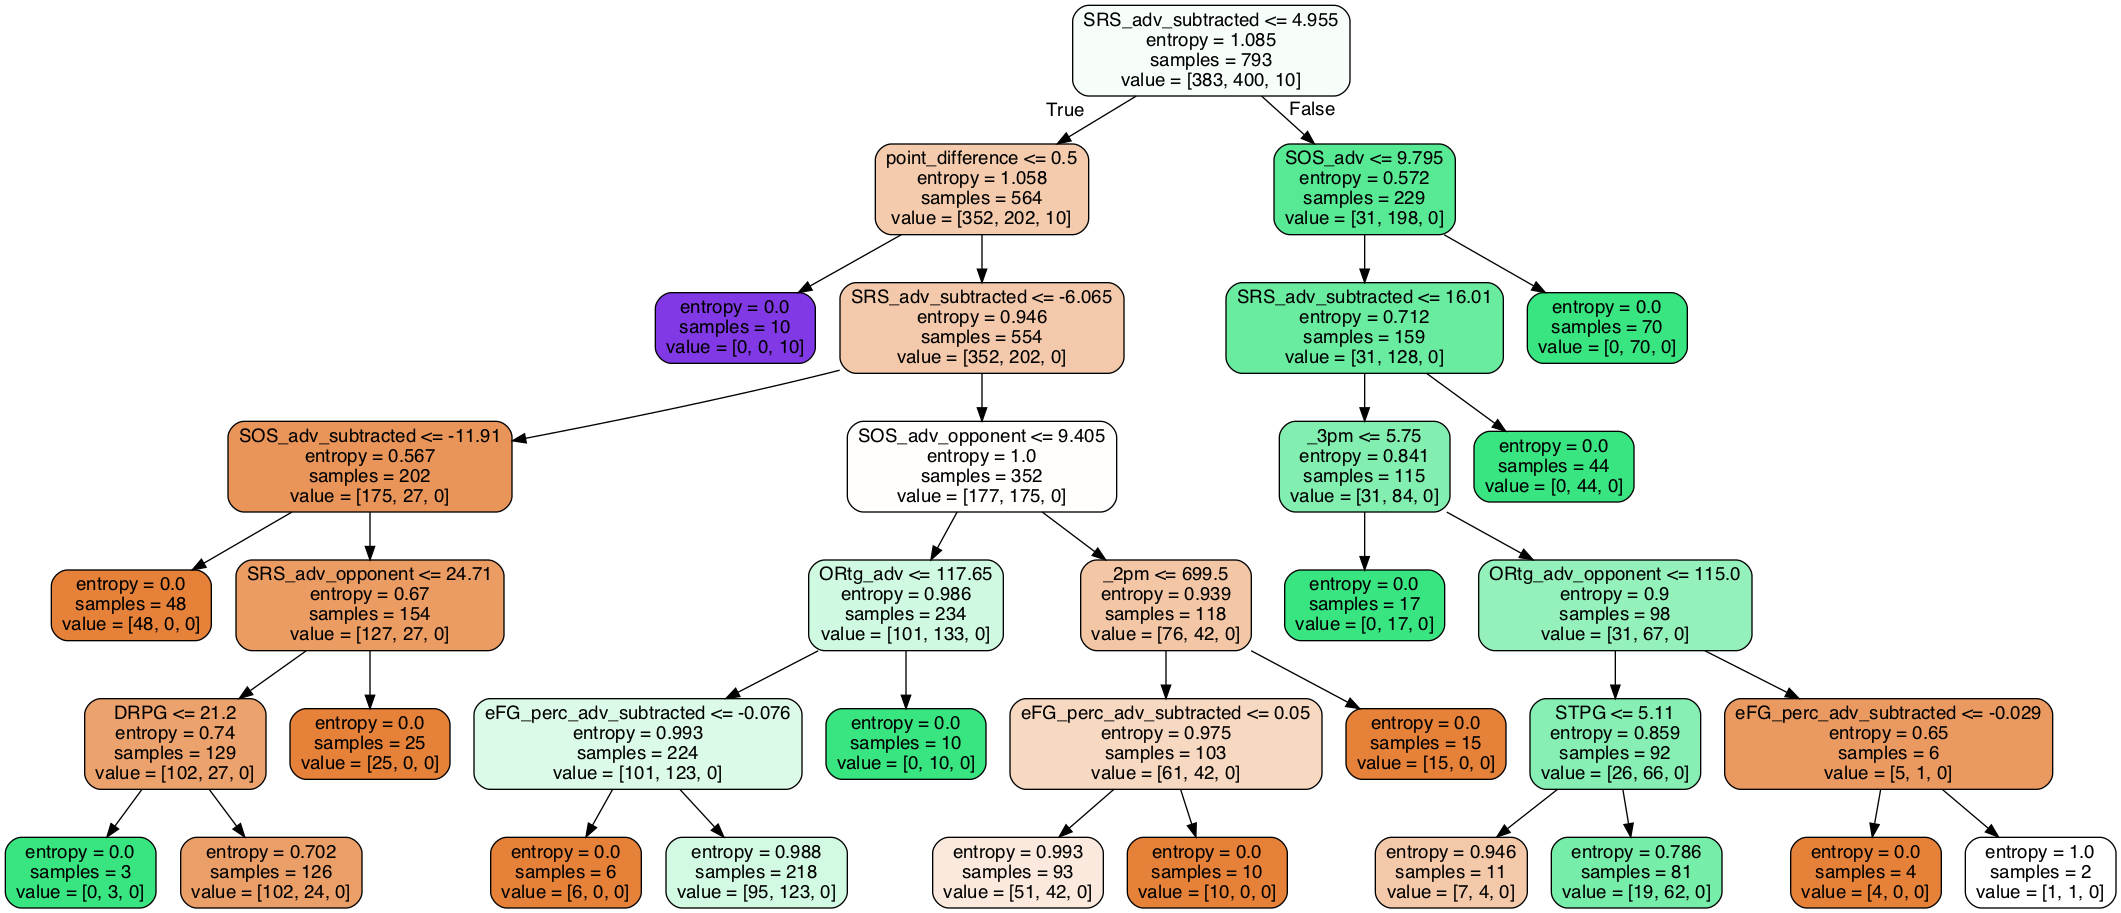

In [41]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
features = list(X.columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [43]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score


In [44]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.68      0.63      0.66       177
           1       0.62      0.68      0.65       160
        9999       1.00      0.75      0.86         4

    accuracy                           0.65       341
   macro avg       0.77      0.69      0.72       341
weighted avg       0.66      0.65      0.65       341



In [45]:
metrics.accuracy_score(y_test, predictions)


0.6539589442815249

# XGBoost

In [161]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [162]:
clf = XGBClassifier()


In [163]:
# Instantiate XGBClassifier
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [164]:
# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [165]:
# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 91.68%
Validation accuracy: 73.61%


# XGBoost - from medium article
https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

In [145]:
from sklearn import datasets
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [150]:
y_train1 = pd.DataFrame(y_train)
X_train1 = pd.DataFrame(X_train, columns = X_test.columns)

In [151]:
D_train = xgb.DMatrix(X_train1, label=y_train1)
D_test = xgb.DMatrix(X_test, label=y_test)

In [152]:

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [154]:

model = xgb.train(param, D_train, steps)

XGBoostError: [18:50:24] src/objective/multiclass_obj.cu:110: SoftmaxMultiClassObj: label must be in [0, num_class).
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000117224e19 dmlc::LogMessageFatal::~LogMessageFatal() + 57
  [bt] (1) 2   libxgboost.dylib                    0x00000001172bae9d xgboost::obj::SoftmaxMultiClassObj::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*) + 1789
  [bt] (2) 3   libxgboost.dylib                    0x0000000117220a9e xgboost::LearnerImpl::UpdateOneIter(int, xgboost::DMatrix*) + 1278
  [bt] (3) 4   libxgboost.dylib                    0x000000011724134c XGBoosterUpdateOneIter + 172
  [bt] (4) 5   libffi.6.dylib                      0x00000001051f2884 ffi_call_unix64 + 76
  [bt] (5) 6   ???                                 0x00007ffeec13cc90 0x0 + 140732859141264



In [155]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

NameError: name 'model' is not defined

# SVM

In [47]:
from time import time

In [170]:
from sklearn.svm import SVC  
tic = time()
svclassifier = SVC(kernel='rbf', C=1000) 
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.05667996406555176 seconds


In [90]:
len(X_test)

341

In [89]:
len(y_pred)

341

In [171]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[134  43   0]
 [ 43 117   0]
 [  0   0   4]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       177
           1       0.73      0.73      0.73       160
        9999       1.00      1.00      1.00         4

    accuracy                           0.75       341
   macro avg       0.83      0.83      0.83       341
weighted avg       0.75      0.75      0.75       341

The accuracy score is 0.7478005865102639


# Some data analysis

In [99]:
test=X_test
test['predict']=y_pred
test['actual']=y_test

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
test

,point_difference,team_seed,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round,predict,actual
348,9,4,1,2.85,6.00,14.3,1.55,7.5,20.0,676.0,1263.0,0.535,75.2,0.484,0.383,0.707,10.7,24.5,35.1,13,21.28,10.05,64.1,116.1,0.549,2013,2.36,-3.27,64.0,113.1,0.539,18.92,13.32,0.1,3.0,0.010,1,1,1
229,3,10,0,2.56,6.50,14.6,1.13,5.3,18.0,651.0,1299.0,0.501,71.6,0.441,0.302,0.671,15.0,23.4,38.4,7,12.13,7.53,64.8,106.8,0.483,2012,13.86,3.25,66.4,110.7,0.535,-1.73,4.28,-1.6,-3.9,-0.052,1,1,0
228,3,7,1,3.29,6.81,13.7,1.03,6.4,17.0,575.0,1107.0,0.519,74.0,0.473,0.376,0.715,11.0,26.2,37.1,10,13.86,3.25,66.4,110.7,0.535,2012,12.13,7.53,64.8,106.8,0.483,1.73,-4.28,1.6,3.9,0.052,1,1,1
1069,15,16,0,2.78,6.78,13.2,1.06,8.8,25.0,553.0,1038.0,0.533,76.8,0.453,0.351,0.741,8.8,25.6,34.4,1,-4.78,-5.50,71.4,107.4,0.530,2019,23.94,11.35,75.9,112.7,0.529,-28.72,-16.85,-4.5,-5.3,0.001,1,0,0
715,3,4,0,4.18,6.39,13.5,1.37,9.3,24.0,599.0,1181.0,0.507,81.5,0.459,0.387,0.722,12.2,24.1,36.3,1,19.23,10.59,68.4,117.7,0.537,2016,18.05,8.64,69.5,112.8,0.525,1.18,1.95,-1.1,4.9,0.012,3,1,0
911,2,3,0,4.27,7.39,14.4,1.15,7.0,19.0,631.0,1226.0,0.515,75.2,0.464,0.366,0.701,11.0,24.9,35.9,1,19.38,9.60,68.3,108.4,0.520,2018,26.64,10.24,70.1,122.3,0.595,-7.26,-0.64,-1.8,-13.9,-0.075,4,0,0
793,9,13,0,4.41,5.68,13.4,1.19,6.4,17.0,697.0,1254.0,0.556,73.6,0.496,0.369,0.702,9.4,24.9,34.2,4,6.67,-3.27,65.4,112.4,0.554,2017,20.13,8.79,70.0,112.6,0.557,-13.46,-12.06,-4.6,-0.2,-0.003,1,0,0
85,11,12,0,4.12,6.12,15.0,1.40,7.9,20.0,581.0,1163.0,0.500,70.2,0.463,0.400,0.691,9.1,24.1,33.2,1,11.23,2.79,63.2,109.5,0.531,2011,24.10,7.62,69.7,116.0,0.570,-12.87,-4.83,-6.5,-6.5,-0.039,3,0,0
1067,2,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,1,22.79,9.53,67.6,106.9,0.535,2019,27.79,5.01,71.7,122.2,0.590,-5.00,4.52,-4.1,-15.3,-0.055,4,0,1
662,1,8,1,5.00,5.21,13.8,1.03,7.6,19.0,592.0,1342.0,0.441,76.0,0.425,0.392,0.738,13.2,29.2,42.4,9,12.04,7.64,70.8,106.3,0.488,2016,15.89,6.28,66.1,109.0,0.516,-3.85,1.36,4.7,-2.7,-0.028,1,0,0


In [106]:
i = 0
correct_incorrect = []
for thing in list(test['actual']):
    if list(test['predict'])[i]==thing:
        correct_incorrect.append(1)
        i+=1
    else:
        correct_incorrect.append(0)
        i+=1

In [107]:
test['correct_incorrect']=correct_incorrect

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
pd.set_option('display.max_rows', 400)
test

,point_difference,team_seed,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round,predict,actual,correct_incorrect
348,9,4,1,2.85,6.00,14.3,1.55,7.5,20.0,676.0,1263.0,0.535,75.2,0.484,0.383,0.707,10.7,24.5,35.1,13,21.28,10.05,64.1,116.1,0.549,2013,2.36,-3.27,64.0,113.1,0.539,18.92,13.32,0.1,3.0,0.010,1,1,1,1
229,3,10,0,2.56,6.50,14.6,1.13,5.3,18.0,651.0,1299.0,0.501,71.6,0.441,0.302,0.671,15.0,23.4,38.4,7,12.13,7.53,64.8,106.8,0.483,2012,13.86,3.25,66.4,110.7,0.535,-1.73,4.28,-1.6,-3.9,-0.052,1,1,0,0
228,3,7,1,3.29,6.81,13.7,1.03,6.4,17.0,575.0,1107.0,0.519,74.0,0.473,0.376,0.715,11.0,26.2,37.1,10,13.86,3.25,66.4,110.7,0.535,2012,12.13,7.53,64.8,106.8,0.483,1.73,-4.28,1.6,3.9,0.052,1,1,1,1
1069,15,16,0,2.78,6.78,13.2,1.06,8.8,25.0,553.0,1038.0,0.533,76.8,0.453,0.351,0.741,8.8,25.6,34.4,1,-4.78,-5.50,71.4,107.4,0.530,2019,23.94,11.35,75.9,112.7,0.529,-28.72,-16.85,-4.5,-5.3,0.001,1,0,0,1
715,3,4,0,4.18,6.39,13.5,1.37,9.3,24.0,599.0,1181.0,0.507,81.5,0.459,0.387,0.722,12.2,24.1,36.3,1,19.23,10.59,68.4,117.7,0.537,2016,18.05,8.64,69.5,112.8,0.525,1.18,1.95,-1.1,4.9,0.012,3,1,0,0
911,2,3,0,4.27,7.39,14.4,1.15,7.0,19.0,631.0,1226.0,0.515,75.2,0.464,0.366,0.701,11.0,24.9,35.9,1,19.38,9.60,68.3,108.4,0.520,2018,26.64,10.24,70.1,122.3,0.595,-7.26,-0.64,-1.8,-13.9,-0.075,4,0,0,1
793,9,13,0,4.41,5.68,13.4,1.19,6.4,17.0,697.0,1254.0,0.556,73.6,0.496,0.369,0.702,9.4,24.9,34.2,4,6.67,-3.27,65.4,112.4,0.554,2017,20.13,8.79,70.0,112.6,0.557,-13.46,-12.06,-4.6,-0.2,-0.003,1,0,0,1
85,11,12,0,4.12,6.12,15.0,1.40,7.9,20.0,581.0,1163.0,0.500,70.2,0.463,0.400,0.691,9.1,24.1,33.2,1,11.23,2.79,63.2,109.5,0.531,2011,24.10,7.62,69.7,116.0,0.570,-12.87,-4.83,-6.5,-6.5,-0.039,3,0,0,1
1067,2,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,1,22.79,9.53,67.6,106.9,0.535,2019,27.79,5.01,71.7,122.2,0.590,-5.00,4.52,-4.1,-15.3,-0.055,4,0,1,0
662,1,8,1,5.00,5.21,13.8,1.03,7.6,19.0,592.0,1342.0,0.441,76.0,0.425,0.392,0.738,13.2,29.2,42.4,9,12.04,7.64,70.8,106.3,0.488,2016,15.89,6.28,66.1,109.0,0.516,-3.85,1.36,4.7,-2.7,-0.028,1,0,0,1


In [115]:
incorrect=test[(test['correct_incorrect']==0)]

In [116]:
correct = test[(test['correct_incorrect']==1)]

In [119]:
wins = test[(test['actual']==1)]

In [121]:
wins_correct=wins[(wins['correct_incorrect']==1)]

In [122]:
wins_incorrect=wins[(wins['correct_incorrect']==0)]

In [120]:
losses = test[(test['actual']==0)]

In [128]:
losses_correct=losses[(losses['correct_incorrect']==1)]

In [129]:
losses_incorrect=losses[(losses['correct_incorrect']==0)]

In [118]:
correct[['actual','predict','round','correct_incorrect','higher_or_lower_seed','point_difference']]

,actual,predict,round,correct_incorrect,higher_or_lower_seed,point_difference
348,1,1,1,1,1,9
228,1,1,1,1,1,3
1069,0,0,1,1,0,15
911,0,0,4,1,0,2
793,0,0,1,1,0,9
85,0,0,3,1,0,11
662,0,0,1,1,1,1
426,0,0,2,1,0,8
594,1,1,1,1,1,15
542,1,1,1,1,1,5


In [133]:
wins_incorrect

,point_difference,team_seed,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round,predict,actual,correct_incorrect
1067,2,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,1,22.79,9.53,67.6,106.9,0.535,2019,27.79,5.01,71.7,122.2,0.590,-5.00,4.52,-4.1,-15.3,-0.055,4,0,1,0
1130,1,3,0,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,8.8,25.4,34.3,2,22.79,9.53,67.6,106.9,0.535,2019,24.93,12.34,68.1,113.1,0.552,-2.14,-2.81,-0.5,-6.2,-0.017,5,0,1,0
67,9,13,0,3.21,8.61,12.3,0.82,5.8,17.0,619.0,1201.0,0.515,69.8,0.459,0.340,0.675,13.8,23.7,37.5,4,2.81,-3.13,64.3,106.2,0.509,2011,18.60,8.20,67.8,108.6,0.526,-15.79,-11.33,-3.5,-2.4,-0.017,1,0,1,0
869,5,2,1,3.24,5.50,13.8,1.21,6.7,17.0,662.0,1297.0,0.510,76.3,0.476,0.398,0.758,10.3,26.5,36.8,7,18.25,7.63,67.3,113.8,0.537,2017,16.75,2.19,61.3,117.6,0.578,1.50,5.44,6.0,-3.8,-0.041,2,0,1,0
689,1,2,0,3.41,6.74,16.1,1.45,8.6,25.0,614.0,1089.0,0.564,77.0,0.467,0.344,0.777,9.3,26.4,35.6,1,24.08,9.71,67.3,115.4,0.561,2016,23.87,11.22,69.7,115.0,0.564,0.21,-1.51,-2.4,0.4,-0.003,4,0,1,0
86,1,11,0,3.68,8.53,14.2,1.23,8.2,23.0,547.0,1121.0,0.488,71.5,0.435,0.359,0.719,10.9,21.1,32.0,10,8.56,3.78,65.3,108.3,0.511,2011,13.48,6.45,69.3,99.3,0.490,-4.92,-2.67,-4.0,9.0,0.021,3,0,1,0
973,15,16,0,2.50,7.53,15.4,1.28,10.2,26.0,540.0,1099.0,0.491,73.9,0.445,0.387,0.649,9.9,24.9,34.8,1,-2.02,-3.84,69.2,105.6,0.531,2018,22.21,9.07,60.6,110.4,0.527,-24.23,-12.91,8.6,-4.8,0.004,1,0,1,0
317,7,12,0,5.12,8.39,12.6,1.12,6.9,21.0,671.0,1368.0,0.490,78.2,0.437,0.331,0.684,13.2,25.6,38.8,5,14.42,4.14,70.5,108.4,0.491,2013,18.76,9.73,61.4,104.4,0.486,-4.34,-5.59,9.1,4.0,0.005,1,0,1,0
161,7,12,0,3.71,10.68,12.2,1.07,7.4,22.0,537.0,1177.0,0.456,68.4,0.410,0.337,0.689,12.4,21.3,33.7,5,8.79,0.63,65.2,103.6,0.476,2012,17.42,3.80,67.0,113.3,0.543,-8.63,-3.17,-1.8,-9.7,-0.067,1,0,1,0
42,3,7,1,5.81,5.47,14.6,0.98,5.2,16.0,619.0,1216.0,0.509,70.0,0.456,0.329,0.683,11.8,25.5,37.3,10,11.70,7.93,66.8,103.8,0.502,2011,13.70,11.67,66.0,103.1,0.489,-2.00,-3.74,0.8,0.7,0.013,1,0,1,0
